### CS4423 - Networks
Anton Baykalov  
School of Mathematical and Statistical Sciences  
University of Galway  

[![Open in Binder](images/badge_logo.png)](https://mybinder.org/v2/gh/anton-baykalov/networks/HEAD)

https://mybinder.org/v2/gh/anton-baykalov/networks/HEAD

#### 2. Tree and Graph Traversal

# Week 4, lecture 1: Depth and Breadth First Search. 

In [1]:
import networkx as nx
import numpy as np
opts={"with_labels":True, "node_color":'y'}

Both [DFS](https://en.wikipedia.org/wiki/Depth-first_search)
and [BFS](https://en.wikipedia.org/wiki/Breadth-first_search)
are simple but efficient tree (and graph) traversal algorithms.

## Depth First Search

**DFS**: Given a rooted tree $T$ with root $x$, visit all nodes in the tree.
* $S \gets (x)$
* while $S \neq \emptyset$:
* &nbsp; $y \gets S$.pop() 
* &nbsp; visit($y$) 
* &nbsp; $S$.push($y$.children)

Here $S$ is a [**stack**](https://en.wikipedia.org/wiki/Stack_(abstract_data_type)) (LIFO):
$S$.pop() yields the **newest** entry.

EdgeView([(0, 2), (1, 2), (1, 3), (2, 4), (2, 6), (2, 5), (3, 7), (5, 8), (7, 9)])

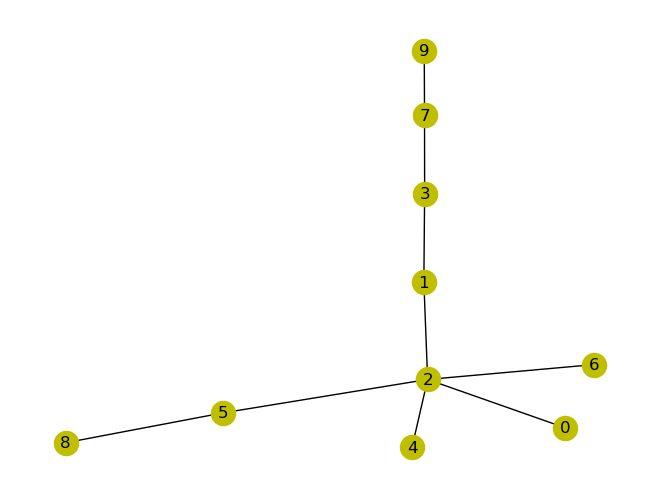

In [2]:
TT = nx.random_labeled_tree(10)
nx.draw(TT, **opts)
TT.edges()

In [3]:
T = TT.copy()
x = 0
stack = [x]
while len(stack) > 0:
    y = stack.pop()
    stack.extend(T[y])
    T.remove_node(y)
    print(y, stack)

0 [2]
2 [1, 4, 6, 5]
5 [1, 4, 6, 8]
8 [1, 4, 6]
6 [1, 4]
4 [1]
1 [3]
3 [7]
7 [9]
9 []


## Breadth First Search

**BFS**: Given a rooted tree $T$ with root $x$, visit all nodes in the tree.
* $Q \gets (x)$
* while $Q \neq \emptyset$:
* &nbsp; $y \gets Q$.pop() 
* &nbsp; visit($y$) 
* &nbsp; $Q$.push($y$.children)

Here, $Q$ is a [**queue**](https://en.wikipedia.org/wiki/Queue_(abstract_data_type)) (FIFO):
$Q$.pop() yields the **oldest** entry.

In [4]:
T = TT.copy()
x = 0
queue = [x]
while len(queue) > 0:
    y = queue.pop(0)
    queue.extend(T[y])
    T.remove_node(y)
    print(y, queue)

0 [2]
2 [1, 4, 6, 5]
1 [4, 6, 5, 3]
4 [6, 5, 3]
6 [5, 3]
5 [3, 8]
3 [8, 7]
8 [7]
7 [9]
9 []


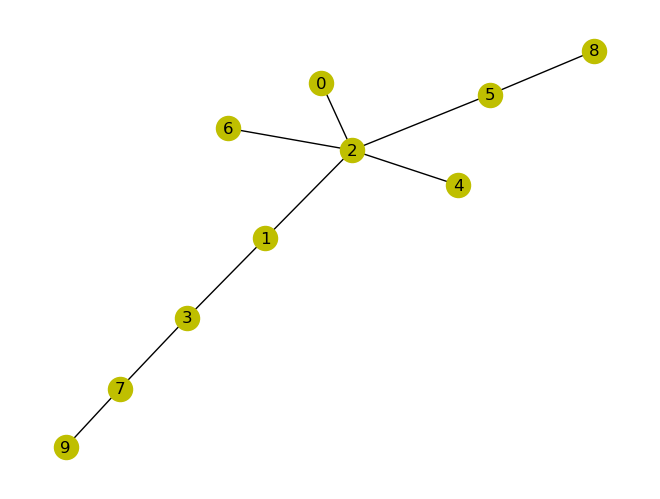

In [5]:
nx.draw(TT, **opts)

Many questions on networks concerning distance and connectivity can
be answered by a versatile strategy called **Breadth First Search (BFS)**
which effectively grows a **spanning tree** of the underlying graph.

### Alternative Implementations

Both DFS and BFS are more like strategies, rather than specific algorithms.
Different problems might require different implementations.
Sometimes, the stack, or the queue don't have to be made explicit:

* In a recursive implementation, DFS can make use of the (`python`) interpreter's
  **function call stack**.
  
* BFS can take advantage of the fact that some types of lists in a (`python`) `for` loops
  are largely organized as **queues**.


In order to keep track of which nodes have already been visited, we maintain for each node
an attribute `"seen"` that is initially `False`, and becomes `True` when the DFS/BFS visits the node.

In `networkx`, the attributes of a node `x` in a graph `G` are kept in a dictionary `G.nodes[x]`.

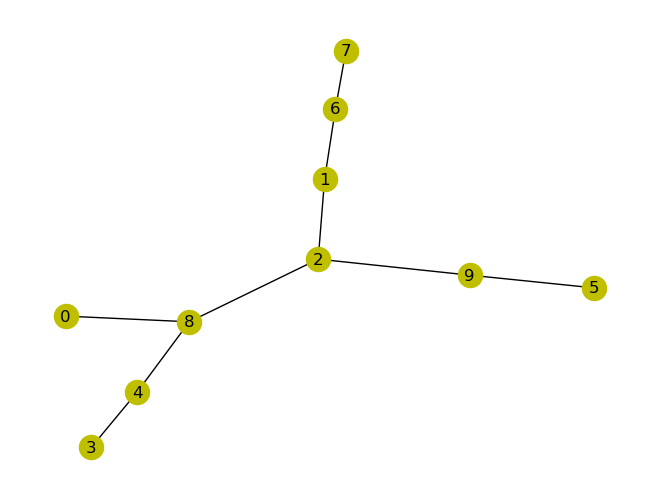

In [6]:
n = 10
T = nx.random_labeled_tree(n)
nx.draw(T, **opts)

In [7]:
TT = T.copy()
for x in TT:
    TT.nodes[x]['seen'] = False
TT.nodes('seen')

NodeDataView({0: False, 1: False, 2: False, 3: False, 4: False, 5: False, 6: False, 7: False, 8: False, 9: False}, data='seen')

* DFS on a tree:

In [8]:
def dfs(tree, x):      
    print(x, end=', ') 
    tree.nodes[x]['seen'] = True
    for z in tree[x]:
        if not tree.nodes[z]['seen']:
            dfs(tree, z)    

In [9]:
dfs(TT, 3)

3, 4, 8, 0, 2, 1, 6, 7, 9, 5, 

* BFS on a tree:

In [10]:
TT = T.copy()
for x in TT:
    TT.nodes[x]['seen'] = False

In [11]:
Q = [3]
TT.nodes[3]['seen'] = True
for y in Q:
    print(y, end=', ')
    for z in TT[y]:
        if not TT.nodes[z]['seen']:
            Q.append(z)
            TT.nodes[z]['seen'] = True

3, 4, 8, 0, 2, 1, 9, 6, 5, 7, 

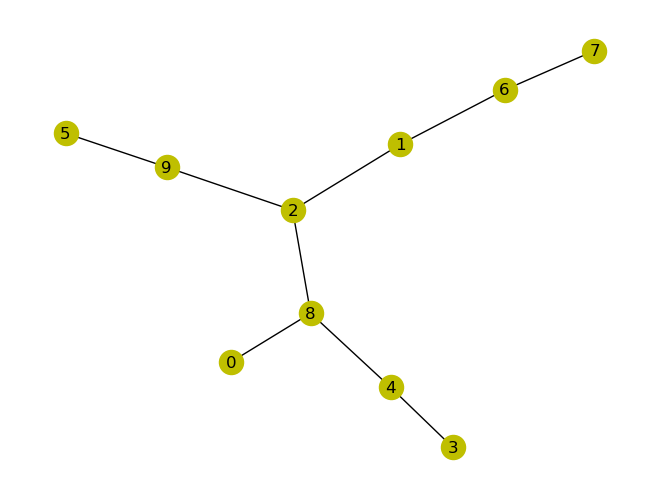

In [12]:
nx.draw(T, **opts)

## Graph Traversal

## Shortest Paths

* Recall that a __path__ in a network $G = (X, E)$
is a sequence $p = (x_0, x_1, \dots, x_k)$ of (distinct)
nodes $x_i \in X$, $i = 0, \dots, k$, such that any
pair of consecutive nodes forms an edge in $G$, i.e.,
$\{x_{i-1}, x_i\} \in E$ for all $i = 1, \dots, k$.

* The __length__ $l(p)$ of the path $p$ is the
number of edges, $l(p) = k$.

* In many practical applications it is of interest to find
for a pair $x, y$ of nodes, one or all the paths form $x$ to $y$
connecting the two nodes with the **fewest number of edges** possible.

* This is a more complex measure on a network than, say, the degree
of a node. And we will need a more complex procedure, that is, an
algorithm, in order to answer such questions systematically.
Let's start with a proper definition.

**Definition.** Let $G = (X, E)$ be a simple graph and let
$x, y \in X$.  Let $P(x, y)$ be the set of all paths from $x$ to $y$.
Then the __distance__ $d(x, y)$ from $x$ to $y$ is
$$d(x, y) = \min \{ l(p) : p \in P(x, y) \},$$
the shortest possible length of a path from $x$ to $y$, and a __shortest path__ from $x$ to $y$ is a path $p \in P(x, y)$ of length $l(p) = d(x, y)$.

The __diameter__ $\mathrm{diam}(G)$ of the network $G$ is the length of the longest shortest path between any two nodes,
$$\mathrm{diam}(G) = \max \{ d(x, y) : x, y \in X \}.$$


##  Code Corner

`python`

* `[].pop` [[doc]](https://docs.python.org/2/tutorial/datastructures.html)

* `[].extend`  [[doc]](https://docs.python.org/2/tutorial/datastructures.html)

### `networkx`

* `remove_node`: [[doc]](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.remove_node.html)


* `edge_subgraph`: [[doc]](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.edge_subgraph.html)